In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import numpy as np
#import cv2 as cv
import tensorflow as tf
from concurrent.futures import ThreadPoolExecutor
import os
import tensorflow as tf

In [7]:
import pathlib


path = "F:\\Mini Project\\Project\\Dataset"

In [6]:
print(len(tf.config.list_physical_devices('GPU')))

0


In [ ]:
def get_from_dir(dir):
    global path
    dir = os.path.join(path,dir)
    return tf.keras.utils.image_dataset_from_directory(
           dir,
           labels='inferred',
           color_mode="rgb",
           seed=42,
           batch_size=32,
           image_size=(128, 128))

train = get_from_dir("Train")
test = get_from_dir("Test")
val = get_from_dir("Validation")

: 

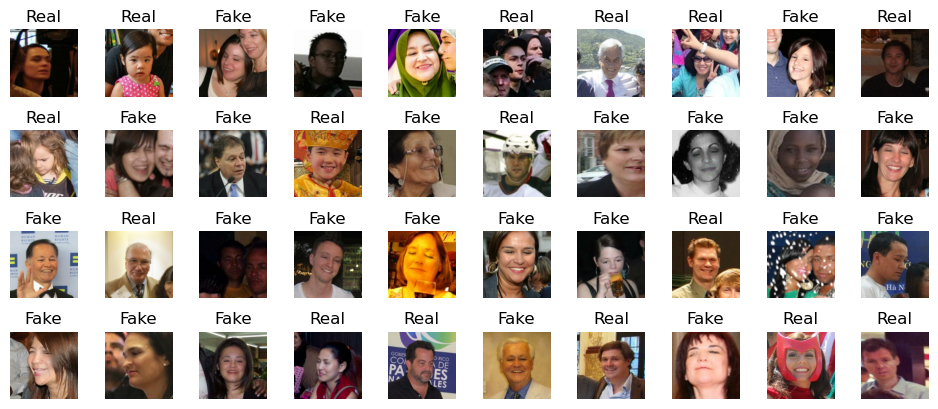

In [11]:
from matplotlib import pyplot as plt

class_names = np.unique(train.class_names)

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
data = list(train.take(n_rows*n_cols))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col

        single_image = data[index][0][0]
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(single_image.numpy().astype("uint8"),cmap="gray")
        plt.axis('off')

        label_index = data[index][1][0]
        plt.title(class_names[label_index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [12]:
model = models.Sequential()


model.add(layers.Conv2D(32,(3,3),activation="relu", padding='same',input_shape=(128,128,3)))
model.add(layers.Conv2D(32,(3,3),activation="relu", padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))


model.add(layers.Conv2D(64,(3,3),activation="relu", padding='same'))
model.add(layers.Conv2D(64,(3,3),activation="relu", padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))


model.add(layers.Conv2D(128,(3,3),activation="relu", padding='same'))
model.add(layers.Conv2D(128,(3,3),activation="relu", padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

model.summary()

f:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,514,721 (17.22 MB)

 Trainable params: 4,514,721 (17.22 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile('adam',loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)


history = model.fit(train,epochs=20,batch_size=32,validation_data=val,callbacks=[early_stopping_cb])

Epoch 1/20
 433/4376 ━━━━━━━━━━━━━━━━━━━━ 41:13 627ms/step - accuracy: 0.6475 - loss: 1.7590

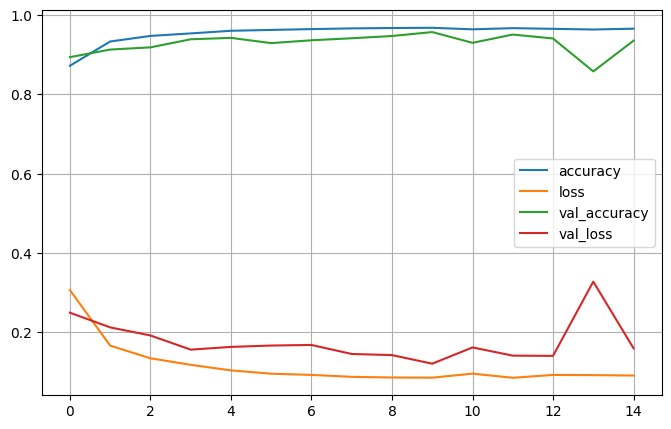

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(test)

341/341 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.9348 - loss: 0.1800


[0.17999087274074554, 0.9334250092506409]

In [ ]:
model.save("deepfake-detector-model.keras")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


true_labels = []
predictions = []

for images, labels in test:
    true_labels.extend(labels.numpy())
    batch_predictions = model.predict(images) >= 0.5
    predictions.extend(batch_predictions.astype(int).flatten())

true_labels = np.array(true_labels)
predictions = np.array(predictions)

cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

: 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5492
           1       0.94      0.93      0.93      5413

    accuracy                           0.93     10905
   macro avg       0.93      0.93      0.93     10905
weighted avg       0.93      0.93      0.93     10905

